In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
# October data
calls_oct_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-october.html'
, header=0, parse_dates=["Date"])

# November data
calls_nov_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-november.html'
, header=0, parse_dates=["Date"])

# December data
calls_dec_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-december.html'
, header=0, parse_dates=["Date"])

# January data
calls_jan_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-january.html'
, header=0, parse_dates=["Date"])

# February data
calls_feb_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-february.html'
, header=0, parse_dates=["Date"])

# March data
calls_mar_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-march.html'
, header=0, parse_dates=["Date"])

# April data
calls_apr_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-april.html'
, header=0, parse_dates=["Date"])

# Removed these later bc they are playoff games
# # May data
# calls_may_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-may.html'
# , header=0, parse_dates=["Date"])

# # June data
# calls_jun_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-june.html'
# , header=0, parse_dates=["Date"])

# Combine Data
calls_df = pd.concat([calls_oct_df,calls_nov_df,calls_dec_df,calls_jan_df,calls_feb_df,calls_mar_df,calls_apr_df]).reset_index(drop=True)
calls_df = calls_df.drop(1230).reset_index(drop=True)
calls_df.drop(calls_df.index[1230:1269],0,inplace=True)
calls_df


,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,2013-10-29 00:00:00,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN
1,2013-10-29 00:00:00,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN
2,2013-10-29 00:00:00,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN
3,2013-10-30 00:00:00,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN
4,2013-10-30 00:00:00,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN
...,...,...,...,...,...,...,...,...,...,...
1225,"Wed, Apr 16, 2014",8:00p,Detroit Pistons,111,Oklahoma City Thunder,112,Box Score,NaN,18203,NaN
1226,"Wed, Apr 16, 2014",8:00p,Los Angeles Lakers,113,San Antonio Spurs,100,Box Score,NaN,18581,NaN
1227,"Wed, Apr 16, 2014",10:30p,Golden State Warriors,116,Denver Nuggets,112,Box Score,NaN,17232,NaN
1228,"Wed, Apr 16, 2014",10:30p,Los Angeles Clippers,104,Portland Trail Blazers,110,Box Score,NaN,20021,NaN


In [2]:
# f1 is loosely correlated to the accuracy but is less likely to bias by certain factors
from sklearn.metrics import f1_score, make_scorer, classification_report
scorer = make_scorer(f1_score, pos_label=None, average='weighted')

In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1230 non-null   object
 1   Start (ET)       1230 non-null   object
 2   Visitor/Neutral  1230 non-null   object
 3   PTS              1230 non-null   object
 4   Home/Neutral     1230 non-null   object
 5   PTS.1            1230 non-null   object
 6   Unnamed: 6       1230 non-null   object
 7   Unnamed: 7       79 non-null     object
 8   Attend.          1230 non-null   object
 9   Notes            1 non-null      object
dtypes: object(10)
memory usage: 105.7+ KB


In [4]:
# Rename columns accordingly
calls_df.columns = ['Date','Start (ET)','Visitor Team','VisitorPts','Home Team',
                    'HomePts','Score Type','OT?','Attendance','Notes']
calls_df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes
0,2013-10-29 00:00:00,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN
1,2013-10-29 00:00:00,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN
2,2013-10-29 00:00:00,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN
3,2013-10-30 00:00:00,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN
4,2013-10-30 00:00:00,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN


In [5]:
# Create target class
calls_df['HomeWin'] = calls_df['VisitorPts'] < calls_df['HomePts']
# Class values
y_true = calls_df['HomeWin'].values
calls_df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes,HomeWin
0,2013-10-29 00:00:00,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,True
1,2013-10-29 00:00:00,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,True
2,2013-10-29 00:00:00,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,True
3,2013-10-30 00:00:00,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,True
4,2013-10-30 00:00:00,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN,True


# Baseline?

Home teams win games more frequently which is true in most sports.

In [6]:
# Find Home Win Percentage; 56.742424242424235
n_games = calls_df['HomeWin'].count()
n_homewins = calls_df['HomeWin'].sum()
win_percentage = n_homewins / n_games * 100
print(f"Home Win percentage: {win_percentage}%")

Home Win percentage: 56.82926829268292%


In [7]:
# Convert to an f1 measure; simple classifier that predicts home team wins more frequently
# This will be score we need to beat with model
from sklearn.metrics import f1_score
y_pred = [1] * len(y_true)
print("F1: {:.4f}".format(f1_score(y_true, y_pred, pos_label=None, average='weighted')))

F1: 0.4119


# Create more features

In [8]:
# Did teams win their previous games?
calls_df['HomeLastWin']=False
calls_df["VisitorLastWin"]=False
# Compute actual values
from collections import defaultdict
won_last = defaultdict(int)

for index, row in calls_df.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    row["HomeLastWin"] = won_last[home_team]
    row["VisitorLastWin"] = won_last[visitor_team]
    calls_df.iloc[index] = row
    # Set current win
    won_last[home_team] = row["HomeWin"]
    won_last[visitor_team] = not row['HomeWin']
calls_df

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin
0,2013-10-29 00:00:00,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,True,0,0
1,2013-10-29 00:00:00,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,True,0,0
2,2013-10-29 00:00:00,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,True,0,0
3,2013-10-30 00:00:00,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,True,0,0
4,2013-10-30 00:00:00,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,"Wed, Apr 16, 2014",8:00p,Detroit Pistons,111,Oklahoma City Thunder,112,Box Score,NaN,18203,NaN,True,True,False
1226,"Wed, Apr 16, 2014",8:00p,Los Angeles Lakers,113,San Antonio Spurs,100,Box Score,NaN,18581,NaN,False,True,True
1227,"Wed, Apr 16, 2014",10:30p,Golden State Warriors,116,Denver Nuggets,112,Box Score,NaN,17232,NaN,False,False,True
1228,"Wed, Apr 16, 2014",10:30p,Los Angeles Clippers,104,Portland Trail Blazers,110,Box Score,NaN,20021,NaN,True,True,True


Time is on 11:17

# Basic classification with a decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14)
y_true

array([ True,  True,  True, ..., False,  True,  True])

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Create a dataset with the necessary info
X_previouswins = calls_df[["HomeLastWin","VisitorLastWin"]].values
clf = DecisionTreeClassifier(random_state=14)
# X_previouswin to decide if target value (y_true; aka was it a Homewin)
scores = cross_val_score(clf, X_previouswins, y_true, scoring = scorer)
print("Using just the result of whether or not the home team or visitor team won their last games we get an F1 score of:")
print("F1: {0:.4f}".format(np.mean(scores)))

Using just the result of whether or not the home team or visitor team won their last games we get an F1 score of:
F1: 0.4355


The F1 score increased slightly so we are starting to get somewhere.

# Win Streaks?

In [11]:
calls_df["HomeWinStreak"]=0
calls_df["VisitorWinStreak"]=0
from collections import defaultdict
win_streak = defaultdict(int)

for index, row in calls_df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["VisitorWinStreak"] = win_streak[visitor_team]
    calls_df.iloc[index] = row
    # Set current win
    if row["HomeWin"]:
        win_streak[home_team] +=1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1
calls_df[50:70][["Date","Visitor Team","VisitorPts","Home Team","HomePts","HomeWinStreak","VisitorWinStreak"]]

,Date,Visitor Team,VisitorPts,Home Team,HomePts,HomeWinStreak,VisitorWinStreak
50,2013-11-05 00:00:00,Miami Heat,104,Toronto Raptors,95,1,1
51,2013-11-05 00:00:00,Utah Jazz,88,Brooklyn Nets,104,0,0
52,2013-11-05 00:00:00,Indiana Pacers,99,Detroit Pistons,91,1,3
53,2013-11-05 00:00:00,Charlotte Bobcats,102,New York Knicks,97,0,0
54,2013-11-05 00:00:00,Phoenix Suns,104,New Orleans Pelicans,98,1,0
55,2013-11-05 00:00:00,Los Angeles Lakers,104,Dallas Mavericks,123,1,1
56,2013-11-05 00:00:00,San Antonio Spurs,102,Denver Nuggets,94,0,0
57,2013-11-05 00:00:00,Houston Rockets,116,Portland Trail Blazers,101,2,0
58,2013-11-05 00:00:00,Atlanta Hawks,105,Sacramento Kings,100,0,0
59,2013-11-06 00:00:00,Toronto Raptors,90,Charlotte Bobcats,92,1,0


# Basic classification with a decision tree combining win streaks with whether or not last game was won

In [12]:
clf = DecisionTreeClassifier(random_state=14)
X_winstreak = calls_df[["HomeLastWin","VisitorLastWin","HomeWinStreak","VisitorWinStreak"]].values
scores = cross_val_score(clf, X_winstreak, y_true, scoring=scorer)
print("Using whether the home team is ranked higher")
print("F1: {0:.4f}".format(np.mean(scores)))

Using whether the home team is ranked higher
F1: 0.4854


This is slightly better but we want to add more features. Random state is 14 which means if recreating this you should get the same number as above. 

# Which team is better on the ladder?

Using the previous year's ladder to not overfit.

In [13]:
ladder=pd.read_csv("2012-2013_Standings.txt", sep=',',header =None,names=['Rk','Team','Overall','Home','Road','E','W','A','C',
                                                                       'SE','NW','P','SW','Pre','Post','≤3','≥10','Oct',
                                                                       'Nov','Dec','Jan','Feb','Mar','Apr'])
ladder = ladder.set_index("Team")
ladder

,Rk,Overall,Home,Road,E,W,A,C,SE,NW,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
Team,,,,,,,,,,,,,,,,,,,,,
Miami Heat,1,66-16,37-4,29-12,41-11,25-5,14-4,12-6,15-1,8-2,...,30-2,9-3,39-8,1-0,10-3,10-5,8-5,12-1,17-1,8-1
Oklahoma City Thunder,2,60-22,34-7,26-15,21-9,39-13,7-3,8-2,6-4,10-6,...,21-8,3-6,44-6,NaN,13-4,11-2,11-5,7-4,12-5,6-2
San Antonio Spurs,3,58-24,35-6,23-18,25-5,33-19,8-2,9-1,8-2,9-9,...,16-12,9-5,31-10,1-0,12-4,12-4,12-3,8-3,10-4,3-6
Denver Nuggets,4,57-25,38-3,19-22,19-11,38-14,5-5,10-0,4-6,11-5,...,24-4,11-7,28-8,0-1,8-8,9-6,12-3,8-4,13-2,7-1
Los Angeles Clippers,5,56-26,32-9,24-17,21-9,35-17,7-3,8-2,6-4,12-6,...,17-9,3-5,38-12,1-0,8-6,16-0,9-7,8-5,7-7,7-1
Memphis Grizzlies,6,56-26,32-9,24-17,22-8,34-18,8-2,8-2,6-4,12-6,...,23-8,6-4,28-9,0-1,12-1,7-7,10-7,9-2,11-6,7-2
New York Knicks,7,54-28,31-10,23-18,37-15,17-13,10-6,12-6,15-3,6-4,...,22-10,7-5,31-12,NaN,11-4,10-5,7-6,6-5,12-6,8-2
Brooklyn Nets,8,49-33,26-15,23-18,36-16,13-17,11-5,13-5,12-6,5-5,...,18-11,9-4,23-17,NaN,11-4,5-11,11-4,7-5,8-7,7-2
Indiana Pacers,9,49-32,30-11,19-21,31-20,18-12,6-11,13-3,12-6,3-7,...,17-11,4-9,27-14,1-0,7-8,10-5,9-6,9-3,11-5,2-5


# Create new feature -- HomeTeamRanksHigher

In [14]:
def home_team_ranks_higher(row):
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    # Team name change so had to fix that
    if home_team == "New Orleans Pelicans":
        home_team = "New Orleans Hornets"
    if visitor_team == "New Orleans Pelicans":
        visitor_team = "New Orleans Hornets"
    home_rank = ladder.loc[home_team]["Rk"]
    visitor_rank = ladder.loc[visitor_team]["Rk"]
    return home_rank < visitor_rank # Ranking == lower number

calls_df["HomeTeamRanksHigher"] = calls_df.apply(home_team_ranks_higher, axis=1)
calls_df[:5][["Date","Visitor Team","VisitorPts","Home Team","HomePts","HomeWin","HomeTeamRanksHigher"]]

,Date,Visitor Team,VisitorPts,Home Team,HomePts,HomeWin,HomeTeamRanksHigher
0,2013-10-29 00:00:00,Orlando Magic,87,Indiana Pacers,97,True,True
1,2013-10-29 00:00:00,Chicago Bulls,95,Miami Heat,107,True,True
2,2013-10-29 00:00:00,Los Angeles Clippers,103,Los Angeles Lakers,116,True,False
3,2013-10-30 00:00:00,Brooklyn Nets,94,Cleveland Cavaliers,98,True,False
4,2013-10-30 00:00:00,Boston Celtics,87,Toronto Raptors,93,True,False


In [15]:
calls_df["HomeTeamRanksHigher"].value_counts()

True     618
False    612
Name: HomeTeamRanksHigher, dtype: int64

# Basic classification with a decision tree combining whether or not last game was won with rankings of each team

In [16]:
X_homehigher = calls_df[["HomeLastWin","VisitorLastWin","HomeTeamRanksHigher"]].values
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf,X_homehigher,y_true,scoring=scorer)
print("Using whether the home team home team is ranked higher")
print("F1: {0:.4f}".format(np.mean(scores)))

Using whether the home team home team is ranked higher
F1: 0.5849


This is much better than the last classifier. We are going to tune the parameters of the Decision Tree model but don't expect much impact to be provided (tuning parameters on Decision Trees usually doesn't provide much impact).

In [17]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
                    "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                                                     }
clf = DecisionTreeClassifier(random_state=14)
grid = GridSearchCV(clf,parameter_space,scoring=scorer)
grid.fit(X_homehigher, y_true)
print("F1: {0:.4}".format(grid.best_score_))

F1: 0.5849


As you can see three was zero impact lmao.

# Now lets look at whether the home team won the last game between the two teams

In [18]:
last_match_winner = defaultdict(int)

def home_team_won_last(row):
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    
    # Sort for consistent ordering
    teams = tuple(sorted([home_team,visitor_team]))
    result = 1 if last_match_winner[teams] == row["Home Team"] else 0
    # Update record for next encounter
    winner = row["Home Team"] if row["HomeWin"] else row["Visitor Team"]
    
    last_match_winner[teams] = winner
    
    return result
calls_df["HomeTeamWonLast"] = calls_df.apply(home_team_won_last, axis=1)
calls_df[80:100][["Date","Visitor Team","VisitorPts","Home Team","HomePts","HomeWin",'HomeTeamWonLast']]

,Date,Visitor Team,VisitorPts,Home Team,HomePts,HomeWin,HomeTeamWonLast
80,2013-11-08 00:00:00,Los Angeles Lakers,85,New Orleans Pelicans,96,True,0
81,2013-11-08 00:00:00,Golden State Warriors,74,San Antonio Spurs,76,True,0
82,2013-11-08 00:00:00,Denver Nuggets,103,Phoenix Suns,114,True,0
83,2013-11-08 00:00:00,Sacramento Kings,91,Portland Trail Blazers,104,True,0
84,2013-11-09 00:00:00,Utah Jazz,91,Toronto Raptors,115,True,0
85,2013-11-09 00:00:00,Orlando Magic,94,Atlanta Hawks,104,True,0
86,2013-11-09 00:00:00,Indiana Pacers,96,Brooklyn Nets,91,False,0
87,2013-11-09 00:00:00,Philadelphia 76ers,125,Cleveland Cavaliers,127,True,0
88,2013-11-09 00:00:00,Boston Celtics,111,Miami Heat,110,False,0
89,2013-11-09 00:00:00,Los Angeles Clippers,107,Houston Rockets,94,False,0


In [19]:
calls_df

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeWinStreak,VisitorWinStreak,HomeTeamRanksHigher,HomeTeamWonLast
0,2013-10-29 00:00:00,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,True,0,0,0,0,True,0
1,2013-10-29 00:00:00,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,True,0,0,0,0,True,0
2,2013-10-29 00:00:00,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,True,0,0,0,0,False,0
3,2013-10-30 00:00:00,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,True,0,0,0,0,False,0
4,2013-10-30 00:00:00,7:00p,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,20155,NaN,True,0,0,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,"Wed, Apr 16, 2014",8:00p,Detroit Pistons,111,Oklahoma City Thunder,112,Box Score,NaN,18203,NaN,True,True,False,2,0,True,1
1226,"Wed, Apr 16, 2014",8:00p,Los Angeles Lakers,113,San Antonio Spurs,100,Box Score,NaN,18581,NaN,False,True,True,4,3,True,1
1227,"Wed, Apr 16, 2014",10:30p,Golden State Warriors,116,Denver Nuggets,112,Box Score,NaN,17232,NaN,False,False,True,0,1,True,0
1228,"Wed, Apr 16, 2014",10:30p,Los Angeles Clippers,104,Portland Trail Blazers,110,Box Score,NaN,20021,NaN,True,True,True,1,2,False,0


In [20]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 1230 non-null   object
 1   Start (ET)           1230 non-null   object
 2   Visitor Team         1230 non-null   object
 3   VisitorPts           1230 non-null   object
 4   Home Team            1230 non-null   object
 5   HomePts              1230 non-null   object
 6   Score Type           1230 non-null   object
 7   OT?                  79 non-null     object
 8   Attendance           1230 non-null   object
 9   Notes                1 non-null      object
 10  HomeWin              1230 non-null   bool  
 11  HomeLastWin          1230 non-null   object
 12  VisitorLastWin       1230 non-null   object
 13  HomeWinStreak        1230 non-null   int64 
 14  VisitorWinStreak     1230 non-null   int64 
 15  HomeTeamRanksHigher  1230 non-null   bool  
 16  HomeTe

# Basic classification with a decision tree combining whether or not last game was won with rankings of each team with whether or not the home team won last time these teams played

In [21]:
X_home_higher = calls_df[["HomeLastWin","VisitorLastWin","HomeTeamRanksHigher","HomeTeamWonLast"]].values
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf,X_home_higher,y_true,scoring=scorer)
print("Using whether the home team is ranked higher overall")
print("Accuracy: {0:.4f}".format(np.mean(scores)))

Using whether the home team is ranked higher overall
Accuracy: 0.5812


Not sure why this value would be less...

# Encoding Teams

- We can encode teams as features.
- Currently, team features are stored as strings and classification methods don't work well with that data type.
- We can improve this by encoding the teams as one-hot features

This creates new features such as "Was this team the Chicago bulls, with values of 1 (Yes) or 0 (No). These will become their own columns.

In [22]:
calls_df["Home Team"].values

array(['Indiana Pacers', 'Miami Heat', 'Los Angeles Lakers', ...,
       'Denver Nuggets', 'Portland Trail Blazers', 'Sacramento Kings'],
      dtype=object)

Video at 24.34

# OneHotEncoder

This helps us turn categorical variables into many columns with 0s and 1s for whether or not the class is true for the row

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
encoding.fit(calls_df["Home Team"].values)

LabelEncoder()

In [24]:
home_teams = encoding.transform(calls_df["Home Team"].values)
visitor_teams = encoding.transform(calls_df["Visitor Team"].values)
X_teams = np.vstack([home_teams, visitor_teams]).T
X_teams[:5], X_teams.shape

(array([[11, 21],
        [15,  4],
        [13, 12],
        [ 5,  2],
        [27,  1]]),
 (1230, 2))

In [25]:
onehot = OneHotEncoder()
X_teams = onehot.fit_transform(X_teams).todense()

In [26]:
X_teams.shape

(1230, 60)

In [27]:
print("Home:", X_teams[0,:30])
print("Visitor:", X_teams[0,30:])

Home: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
Visitor: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]]


# Decision Tree Classifer with just the team

In [28]:
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_teams, y_true, scoring=scorer)
print("F1: {0:.4f}".format(np.mean(scores)))

F1: 0.6033


# Random Forest Classifier with just the team

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=14)
scores = cross_val_score(clf, X_teams, y_true, scoring=scorer)
print("Using full team labels")
print("F1: {0:.4f}".format(np.mean(scores)))

Using full team labels
F1: 0.6015


Slightly better. Can we do better?

In [30]:
parameter_space = {"max_features": [2,10,50,'auto'],
                   "n_estimators": [50,100,200],
                   "criterion": ["gini","entropy"],
                   "min_samples_leaf":[1,2,4,6],
                  }
clf = RandomForestClassifier(random_state=14)
grid = GridSearchCV(clf,parameter_space,scoring=scorer)
grid.fit(X_teams,y_true)
print("F1: {0:.4f}".format(grid.best_score_))
print(grid.best_estimator_)

F1: 0.6402
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=14, verbose=0,
                       warm_start=False)


Result here is much better.

# Basic classification with a decision tree combining whether or not last game was won with rankings of each team with whether or not the home team won last time these teams played with team features

In [31]:
X_all = np.hstack([X_home_higher,X_teams])
print(X_all.shape)

(1230, 64)


In [32]:
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf,X_all,y_true,scoring=scorer)
print("F1: {0:.4f}".format(np.mean(scores)))

F1: 0.5797


Not great. Let's see if tuning parameters fixes anything.

In [33]:
parameter_space = {"max_features": [2,10,50,'auto'],
                   "n_estimators": [50,100,200],
                   "criterion": ["gini","entropy"],
                   "min_samples_leaf":[1,2,4,6],
                  }
clf = RandomForestClassifier(random_state=14)
grid = GridSearchCV(clf,parameter_space,scoring=scorer)
grid.fit(X_all,y_true)
print("F1: {0:.4f}".format(grid.best_score_))
print(grid.best_estimator_)

F1: 0.6229
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=14, verbose=0,
                       warm_start=False)


This is much better overall. Small drop in performance compared to just using the X_teams.

C:\Users\Sebeast\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


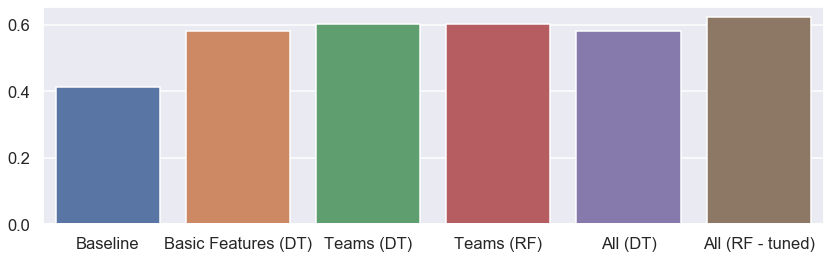

In [59]:
# Gratuitous graph
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable
labels = ["Baseline","Basic Features (DT)","Teams (DT)","Teams (RF)","All (DT)","All (RF - tuned)"]
scores = [0.4119,0.5812,0.6033,0.6015,0.5797,0.6229]
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid",context="talk")
sns.barplot(labels, scores);


Tuned Random Forest with all features is doing better than everything else. More data is better than less. One advantage of Random Forest the better features will tend to bubble to the top and get used more frequently. Adding data rarely makes that model worse.

# Lets try out other models now

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Classifiers():
    def __init__(self, x_train, x_test, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
    def logistic_regression(self):
        model = LogisticRegression()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def decision_tree(self):
        model = tree.DecisionTreeClassifier(criterion='gini')
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def naive_bayes(self):
        model = GaussianNB()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def knn(self):
        model = KNeighborsClassifier(n_neighbors=6)
        model.fit(self.x_train, self.y_train)
        predicted= model.predict(self.x_test)
        return predicted
    def random_forest(self):
        model= RandomForestClassifier()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def xgboost(self):
        model = XGBClassifier()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
# def test():
#     X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     data_to_classify = Classifiers(X_train, X_test, y_train)
#     d = {'original_result': y_test, 'predicted_result': data_to_classify.random_forest()}
#     df = pd.DataFrame(data=d)
#     df["correct_prediction"] = (df.original_result == df.predicted_result)
#     print(df, f"Accuracy Score: \n{df.correct_prediction.value_counts(normalize=True)}")
# test()

def compare_Classifiers_accuracy(X_train, X_test, y_train, y_test):
    outcome_accuracy = {
        "logistic_regression": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).logistic_regression()),
        "decision_tree": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).decision_tree()),
        "naive_bayes": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).naive_bayes()),
        "knn": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).knn()),
        "random_forest": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).random_forest()),
        "xgboost": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).xgboost()),
    }
    return outcome_accuracy
def main():
    seed = 1
    X_all, y_true = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_true, test_size=0.33, random_state=seed)
    print(compare_Classifiers_accuracy(X_train, X_test, y_train, y_test))
main()

[14:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'logistic_regression': 0.9121212121212121, 'decision_tree': 0.9151515151515152, 'naive_bayes': 0.9030303030303031, 'knn': 0.9181818181818182, 'random_forest': 0.9303030303030303, 'xgboost': 0.9181818181818182}


C:\Users\Sebeast\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The Random Forest classifier appears to be the best model to use on this data.

C:\Users\Sebeast\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


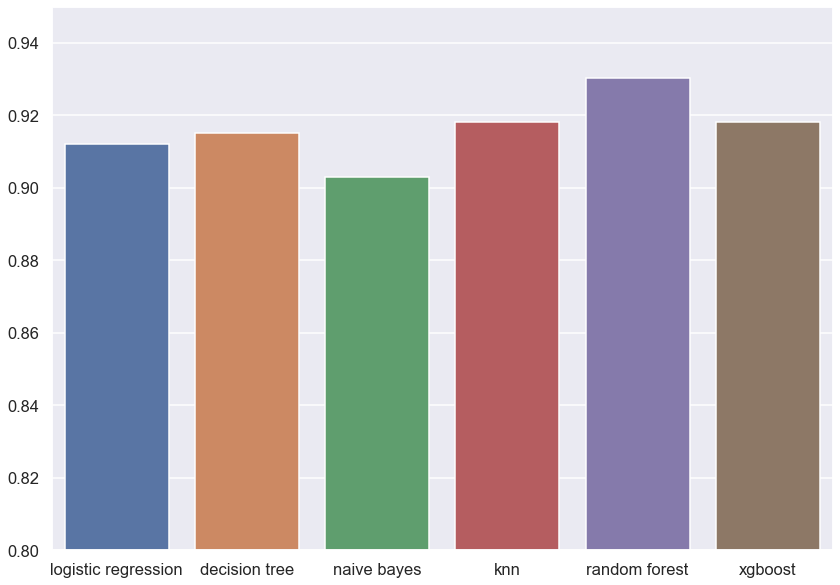

In [68]:
# Gratuitous graph
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable
labels = ["logistic regression","decision tree","naive bayes","knn","random forest","xgboost"]
scores = [0.9121212121212121,0.9151515151515152,0.9030303030303031,0.9181818181818182,0.9303030303030303,0.9181818181818182]
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid",context="talk")
g=sns.barplot(labels, scores);
g.set(ylim=(0.8, .95))
plt.show()

# Now lets use this model on a different season (2018-2019)

In [36]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
# October data
calls_oct_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games.html'
, header=0, parse_dates=["Date"])

# November data
calls_nov_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games-november.html'
, header=0, parse_dates=["Date"])

# December data
calls_dec_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games-december.html'
, header=0, parse_dates=["Date"])

# January data
calls_jan_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games-january.html'
, header=0, parse_dates=["Date"])

# February data
calls_feb_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games-february.html'
, header=0, parse_dates=["Date"])

# March data
calls_mar_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games-march.html'
, header=0, parse_dates=["Date"])

# April data
calls_apr_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_games-april.html'
, header=0, parse_dates=["Date"])

# Removed these later bc they are playoff games
# # May data
# calls_may_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-may.html'
# , header=0, parse_dates=["Date"])

# # June data
# calls_jun_df, = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2014_games-june.html'
# , header=0, parse_dates=["Date"])

# Combine Data
games_2019 = pd.concat([calls_oct_df,calls_nov_df,calls_dec_df,calls_jan_df,calls_feb_df,calls_mar_df,calls_apr_df]).reset_index(drop=True)
games_2019.drop(calls_df.index[1230:1280],0,inplace=True)
games_2019 = games_2019.drop(1230).reset_index(drop=True)
games_2019



,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,2018-10-16 00:00:00,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN
1,2018-10-16 00:00:00,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN
2,2018-10-17 00:00:00,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN
3,2018-10-17 00:00:00,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN
4,2018-10-17 00:00:00,7:00p,Memphis Grizzlies,83,Indiana Pacers,111,Box Score,NaN,17923,NaN
...,...,...,...,...,...,...,...,...,...,...
1273,"Sun, Apr 28, 2019",3:30p,Houston Rockets,100,Golden State Warriors,104,Box Score,NaN,19596,NaN
1274,"Mon, Apr 29, 2019",8:00p,Philadelphia 76ers,94,Toronto Raptors,89,Box Score,NaN,19800,NaN
1275,"Mon, Apr 29, 2019",10:30p,Portland Trail Blazers,113,Denver Nuggets,121,Box Score,NaN,19520,NaN
1276,"Tue, Apr 30, 2019",8:00p,Boston Celtics,102,Milwaukee Bucks,123,Box Score,NaN,17536,NaN


In [37]:
# f1 is loosely correlated to the accuracy but is less likely to bias by certain factors
from sklearn.metrics import f1_score, make_scorer, classification_report
scorer = make_scorer(f1_score, pos_label=None, average='weighted')

In [38]:
# Rename columns accordingly
games_2019.columns = ['Date','Start (ET)','Visitor Team','VisitorPts','Home Team',
                    'HomePts','Score Type','OT?','Attendance','Notes']
games_2019.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes
0,2018-10-16 00:00:00,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN
1,2018-10-16 00:00:00,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN
2,2018-10-17 00:00:00,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN
3,2018-10-17 00:00:00,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN
4,2018-10-17 00:00:00,7:00p,Memphis Grizzlies,83,Indiana Pacers,111,Box Score,NaN,17923,NaN


In [39]:
# Create target class
games_2019['HomeWin'] = games_2019['VisitorPts'] < games_2019['HomePts']
# Class values
y_true = games_2019['HomeWin'].values
games_2019.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes,HomeWin
0,2018-10-16 00:00:00,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN,True
1,2018-10-16 00:00:00,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN,True
2,2018-10-17 00:00:00,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN,False
3,2018-10-17 00:00:00,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN,True
4,2018-10-17 00:00:00,7:00p,Memphis Grizzlies,83,Indiana Pacers,111,Box Score,NaN,17923,NaN,True


In [40]:
len(y_true)

1278

In [41]:
ladder=pd.read_csv("2017-2018_Standings.txt", sep=',',header =None,names=['Rk','Team','Overall','Home','Road','E','W','A','C',
                                                                       'SE','NW','P','SW','Pre','Post','≤3','≥10','Oct',
                                                                       'Nov','Dec','Jan','Feb','Mar','Apr'])
ladder_2018 = ladder.set_index("Team")
ladder_2018

,Rk,Overall,Home,Road,E,W,A,C,SE,NW,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
Team,,,,,,,,,,,,,,,,,,,,,
Houston Rockets,1,65-17,34-7,31-10,24-6,41-11,6-4,9-1,9-1,16-2,...,21-4,5-3,38-8,5-3,12-1,9-5,10-4,12-0,14-1,3-3
Toronto Raptors,2,59-23,34-7,25-16,40-12,19-11,12-4,14-4,14-4,5-5,...,18-7,5-7,33-5,4-2,9-5,11-3,10-5,9-2,12-4,4-2
Golden State Warriors,3,58-24,29-12,29-12,24-6,34-18,9-1,6-4,9-1,8-10,...,14-10,5-1,38-13,5-3,11-3,13-2,11-3,8-3,7-7,3-3
Boston Celtics,4,55-27,27-14,28-13,33-19,22-8,12-4,10-8,11-7,9-1,...,15-8,11-8,25-9,5-2,14-2,11-6,7-5,7-4,9-4,2-4
Philadelphia 76ers,5,52-30,30-11,22-19,34-18,18-12,9-7,11-7,14-4,7-3,...,22-5,4-7,31-11,3-4,9-5,5-10,7-5,8-3,13-3,7-0
Cleveland Cavaliers,6,50-32,29-12,21-20,35-17,15-15,11-7,11-5,13-5,5-5,...,16-10,8-5,17-20,3-4,12-3,9-5,6-8,6-4,10-6,4-2
Portland Trail Blazers,7,49-33,28-13,21-20,18-12,31-21,4-6,6-4,8-2,9-7,...,17-7,8-8,20-12,4-3,9-6,5-8,11-5,6-4,12-3,2-4
Indiana Pacers,8,48-34,27-14,21-20,32-20,16-14,11-7,10-6,11-7,3-7,...,15-9,11-2,20-16,4-3,8-7,7-8,10-5,5-4,11-4,3-3
New Orleans Pelicans,9,48-34,24-17,24-17,21-9,27-25,6-4,9-1,6-4,6-12,...,17-8,7-3,19-16,3-4,8-6,7-8,9-5,8-3,8-7,5-1


In [42]:
# Create new feature -- HomeTeamRanksHigher
def home_team_ranks_higher_2018(row):
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    
    home_rank = ladder_2018.loc[home_team]["Rk"]
    visitor_rank = ladder_2018.loc[visitor_team]["Rk"]
    return home_rank < visitor_rank # Ranking higher == lower number
games_2019["HomeTeamRanksHigher"] = games_2019.apply(home_team_ranks_higher_2018, axis=1)
games_2019[:5]

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes,HomeWin,HomeTeamRanksHigher
0,2018-10-16 00:00:00,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN,True,True
1,2018-10-16 00:00:00,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN,True,True
2,2018-10-17 00:00:00,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN,False,False
3,2018-10-17 00:00:00,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN,True,True
4,2018-10-17 00:00:00,7:00p,Memphis Grizzlies,83,Indiana Pacers,111,Box Score,NaN,17923,NaN,True,True


In [43]:
# Did teams win their previous games?
games_2019['HomeLastWin']=False
games_2019["VisitorLastWin"]=False
# Compute actual values
from collections import defaultdict
won_last = defaultdict(int)

for index, row in games_2019.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    row["HomeLastWin"] = won_last[home_team]
    row["VisitorLastWin"] = won_last[visitor_team]
    games_2019.iloc[index] = row
    # Set current win
    won_last[home_team] = row["HomeWin"]
    won_last[visitor_team] = not row['HomeWin']
games_2019

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attendance,Notes,HomeWin,HomeTeamRanksHigher,HomeLastWin,VisitorLastWin
0,2018-10-16 00:00:00,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN,True,True,0,0
1,2018-10-16 00:00:00,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN,True,True,0,0
2,2018-10-17 00:00:00,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN,False,False,0,0
3,2018-10-17 00:00:00,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN,True,True,0,0
4,2018-10-17 00:00:00,7:00p,Memphis Grizzlies,83,Indiana Pacers,111,Box Score,NaN,17923,NaN,True,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,"Sun, Apr 28, 2019",3:30p,Houston Rockets,100,Golden State Warriors,104,Box Score,NaN,19596,NaN,True,False,True,False
1274,"Mon, Apr 29, 2019",8:00p,Philadelphia 76ers,94,Toronto Raptors,89,Box Score,NaN,19800,NaN,False,True,False,True
1275,"Mon, Apr 29, 2019",10:30p,Portland Trail Blazers,113,Denver Nuggets,121,Box Score,NaN,19520,NaN,True,False,True,True
1276,"Tue, Apr 30, 2019",8:00p,Boston Celtics,102,Milwaukee Bucks,123,Box Score,NaN,17536,NaN,True,False,True,False


In [44]:
games_2019["HomeWinStreak"]=0
games_2019["VisitorWinStreak"]=0
from collections import defaultdict
win_streak = defaultdict(int)

for index, row in games_2019.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["VisitorWinStreak"] = win_streak[visitor_team]
    games_2019.iloc[index] = row
    # Set current win
    if row["HomeWin"]:
        win_streak[home_team] +=1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1
games_2019[50:70][["Date","Visitor Team","VisitorPts","Home Team","HomePts","HomeWinStreak","VisitorWinStreak"]]

,Date,Visitor Team,VisitorPts,Home Team,HomePts,HomeWinStreak,VisitorWinStreak
50,2018-10-23 00:00:00,Sacramento Kings,112,Denver Nuggets,126,3,1
51,2018-10-24 00:00:00,Dallas Mavericks,104,Atlanta Hawks,111,1,2
52,2018-10-24 00:00:00,Brooklyn Nets,102,Cleveland Cavaliers,86,0,0
53,2018-10-24 00:00:00,New York Knicks,87,Miami Heat,110,0,0
54,2018-10-24 00:00:00,Minnesota Timberwolves,105,Toronto Raptors,112,4,1
55,2018-10-24 00:00:00,Charlotte Hornets,110,Chicago Bulls,112,0,0
56,2018-10-24 00:00:00,Utah Jazz,100,Houston Rockets,89,0,0
57,2018-10-24 00:00:00,Indiana Pacers,116,San Antonio Spurs,96,1,0
58,2018-10-24 00:00:00,Philadelphia 76ers,108,Milwaukee Bucks,123,3,0
59,2018-10-24 00:00:00,Los Angeles Lakers,131,Phoenix Suns,113,0,0


In [45]:
games_2019["HomeTeamWonLast"] = games_2019.apply(home_team_won_last, axis=1)

In [46]:
games_2019[["Date","Visitor Team","VisitorPts","Home Team","HomePts","HomeWin","HomeLastWin","VisitorLastWin",
            "HomeTeamRanksHigher","HomeWinStreak","VisitorWinStreak","HomeTeamWonLast"]].head()

,Date,Visitor Team,VisitorPts,Home Team,HomePts,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRanksHigher,HomeWinStreak,VisitorWinStreak,HomeTeamWonLast
0,2018-10-16 00:00:00,Philadelphia 76ers,87,Boston Celtics,105,True,0,0,True,0,0,0
1,2018-10-16 00:00:00,Oklahoma City Thunder,100,Golden State Warriors,108,True,0,0,True,0,0,0
2,2018-10-17 00:00:00,Milwaukee Bucks,113,Charlotte Hornets,112,False,0,0,False,0,0,0
3,2018-10-17 00:00:00,Brooklyn Nets,100,Detroit Pistons,103,True,0,0,True,0,0,0
4,2018-10-17 00:00:00,Memphis Grizzlies,83,Indiana Pacers,111,True,0,0,True,0,0,0


In [47]:
X_home_higher_2019 = games_2019[["HomeLastWin","VisitorLastWin","HomeTeamRanksHigher","HomeTeamWonLast"]].values

In [48]:
# Reuse our trained team encoding and onehot classifier as well
encoding = LabelEncoder()
encoding.fit(games_2019["Home Team"].values)
home_teams_2019 = encoding.transform(games_2019["Home Team"].values)
visitor_teams_2019 = encoding.transform(games_2019["Visitor Team"].values)
X_teams_2019 = np.vstack([home_teams_2019,visitor_teams_2019]).T
X_teams_2019 = onehot.transform(X_teams_2019).todense()

In [49]:
X_all_2019 = np.hstack([X_home_higher_2019, X_teams_2019])
X_all_2019.shape

(1278, 64)

# Baseline

In [50]:
print("The home team wins {:.2f}% of matches".format(100*np.mean(y_true)))
y_pred = [1] * len(y_true)
print("F1: {:.4f}".format(f1_score(y_true, y_pred, pos_label=None, average='weighted')))
print(classification_report(y_true, y_pred))

The home team wins 58.76% of matches
F1: 0.4350
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       527
        True       0.59      1.00      0.74       751

    accuracy                           0.59      1278
   macro avg       0.29      0.50      0.37      1278
weighted avg       0.35      0.59      0.44      1278



C:\Users\Sebeast\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
grid.fit(X_all_2019, y_true)
y_pred = grid.predict(X_all_2019)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.67      0.73       527
        True       0.79      0.88      0.83       751

    accuracy                           0.79      1278
   macro avg       0.80      0.78      0.78      1278
weighted avg       0.79      0.79      0.79      1278



F1 score is .79 which is a lot higher than training data so we probably need to do more testing to determine what the cause was (fluke or something else?).

In [53]:
print("This results in getting {:.1f}% of predictions correct!".format(100*np.mean(y_pred == y_true)))

This results in getting 79.4% of predictions correct!


# Create models from the 2018-2019 season to eventually predict current season games.

In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Classifiers():
    def __init__(self, x_train, x_test, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
    def logistic_regression(self):
        model = LogisticRegression()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def decision_tree(self):
        model = tree.DecisionTreeClassifier(criterion='gini')
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def naive_bayes(self):
        model = GaussianNB()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def knn(self):
        model = KNeighborsClassifier(n_neighbors=6)
        model.fit(self.x_train, self.y_train)
        predicted= model.predict(self.x_test)
        return predicted
    def random_forest(self):
        model= RandomForestClassifier()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def xgboost(self):
        model = XGBClassifier()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
# def test():
#     X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     data_to_classify = Classifiers(X_train, X_test, y_train)
#     d = {'original_result': y_test, 'predicted_result': data_to_classify.random_forest()}
#     df = pd.DataFrame(data=d)
#     df["correct_prediction"] = (df.original_result == df.predicted_result)
#     print(df, f"Accuracy Score: \n{df.correct_prediction.value_counts(normalize=True)}")
# test()

def compare_Classifiers_accuracy(X_train, X_test, y_train, y_test):
    outcome_accuracy = {
        "logistic_regression": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).logistic_regression()),
        "decision_tree": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).decision_tree()),
        "naive_bayes": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).naive_bayes()),
        "knn": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).knn()),
        "random_forest": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).random_forest()),
        "xgboost": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).xgboost()),
    }
    return outcome_accuracy
def main():
    seed = 1
    X_all_2019, y_true = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
    X_train, X_test, y_train, y_test = train_test_split(X_all_2019, y_true, test_size=0.33, random_state=seed)
    print(compare_Classifiers_accuracy(X_train, X_test, y_train, y_test))
main()

[14:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'logistic_regression': 0.9121212121212121, 'decision_tree': 0.9212121212121213, 'naive_bayes': 0.9030303030303031, 'knn': 0.9181818181818182, 'random_forest': 0.9333333333333333, 'xgboost': 0.9181818181818182}


C:\Users\Sebeast\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Random forest is best model here.

C:\Users\Sebeast\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


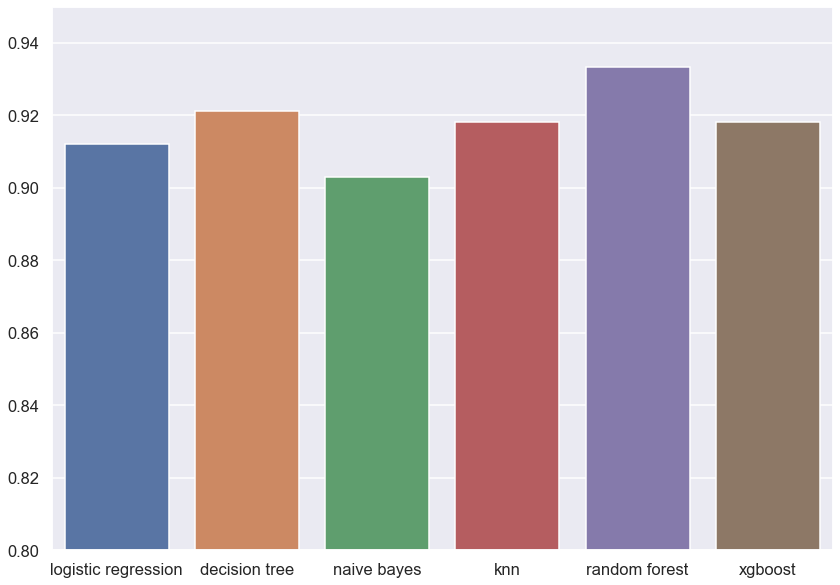

In [66]:
# Gratuitous graph
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable
labels = ["logistic regression","decision tree","naive bayes","knn","random forest","xgboost"]
scores = [0.9121212121212121,0.9212121212121213,0.9030303030303031,0.9181818181818182,0.9333333333333333,0.9181818181818182]
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid",context="talk")
g=sns.barplot(labels, scores);
g.set(ylim=(0.8, .95))
plt.show()

# Run models just using whether or not the home team won their last game, whether or not the visitor team won their last game, which team ranks higher according to last years ladder, and whether or not the home team beat the visitor team last time they played.

In [55]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Classifiers():
    def __init__(self, x_train, x_test, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
    def logistic_regression(self):
        model = LogisticRegression()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def decision_tree(self):
        model = tree.DecisionTreeClassifier(criterion='gini')
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def naive_bayes(self):
        model = GaussianNB()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def knn(self):
        model = KNeighborsClassifier(n_neighbors=6)
        model.fit(self.x_train, self.y_train)
        predicted= model.predict(self.x_test)
        return predicted
    def random_forest(self):
        model= RandomForestClassifier()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
    def xgboost(self):
        model = XGBClassifier()
        model.fit(self.x_train, self.y_train)
        predicted = model.predict(self.x_test)
        return predicted
# def test():
#     X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     data_to_classify = Classifiers(X_train, X_test, y_train)
#     d = {'original_result': y_test, 'predicted_result': data_to_classify.random_forest()}
#     df = pd.DataFrame(data=d)
#     df["correct_prediction"] = (df.original_result == df.predicted_result)
#     print(df, f"Accuracy Score: \n{df.correct_prediction.value_counts(normalize=True)}")
# test()

def compare_Classifiers_accuracy(X_train, X_test, y_train, y_test):
    outcome_accuracy = {
        "logistic_regression": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).logistic_regression()),
        "decision_tree": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).decision_tree()),
        "naive_bayes": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).naive_bayes()),
        "knn": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).knn()),
        "random_forest": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).random_forest()),
        "xgboost": accuracy_score(y_test, Classifiers(X_train, X_test, y_train).xgboost()),
    }
    return outcome_accuracy
def main():
    seed = 1
    X_home_higher_2019, y_true = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
    X_train, X_test, y_train, y_test = train_test_split(X_home_higher_2019, y_true, test_size=0.33, random_state=seed)
    print(compare_Classifiers_accuracy(X_train, X_test, y_train, y_test))
main()

[14:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'logistic_regression': 0.9121212121212121, 'decision_tree': 0.9181818181818182, 'naive_bayes': 0.9030303030303031, 'knn': 0.9181818181818182, 'random_forest': 0.9272727272727272, 'xgboost': 0.9181818181818182}


C:\Users\Sebeast\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The Random Forest is the best model here.

C:\Users\Sebeast\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


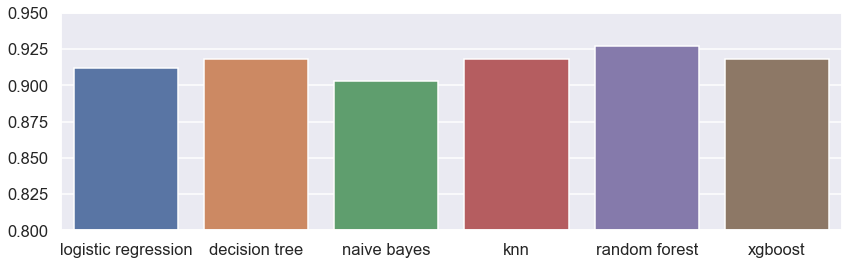

In [67]:
# Gratuitous graph
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable
labels = ["logistic regression","decision tree","naive bayes","knn","random forest","xgboost"]
scores = [0.9121212121212121,0.9181818181818182,0.9030303030303031,0.9181818181818182,0.9272727272727272,0.9181818181818182]
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid",context="talk")
g=sns.barplot(labels, scores);
g.set(ylim=(0.8, .95))
plt.show()

Below is the df of what is being fed into model above. You could use the Random Forest or Naive Bayes model fitted like above and then input in data on upcoming games to predict which team will win.

In [56]:
games_2019[["HomeLastWin","VisitorLastWin","HomeTeamRanksHigher","HomeTeamWonLast"]]

,HomeLastWin,VisitorLastWin,HomeTeamRanksHigher,HomeTeamWonLast
0,0,0,True,0
1,0,0,True,0
2,0,0,False,0
3,0,0,True,0
4,0,0,True,0
...,...,...,...,...
1273,True,False,False,1
1274,False,True,True,0
1275,True,True,False,0
1276,True,False,False,1
